In [42]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [43]:
# Load the csv file
file_path = Path("crypto_data.csv")
df_crypto_raw = pd.read_csv(file_path)
df_crypto_raw.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [44]:
# Discard all cryptocurrencies that are not being traded
# Use the "IsTrading" Column to filter True rows

df_crypto_trading = df_crypto_raw[df_crypto_raw['IsTrading'] == 1]

df_crypto_trading.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [45]:
# Drop the "IsTrading" and "CoinName", "Unnamed" columns
df_crypto_clean = df_crypto_trading.drop(['Unnamed: 0','CoinName','IsTrading'], axis = 1)

# Drop rows that have at least one null value
df_crypto_clean = df_crypto_clean.dropna()

df_crypto_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


In [46]:
# Filter for cryptocurrencies that have 'TotalCoinsMined' greater than 0

df_crypto_clean = df_crypto_clean[df_crypto_clean['TotalCoinsMined'] > 0]

df_crypto_clean = df_crypto_clean.dropna()

df_crypto_clean

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [47]:
# Create dummy variables for 

df_crypto_dummies = pd.get_dummies(df_crypto_clean, columns=['Algorithm', 'ProofType'])
df_crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Question from the HW instructions: Examine how the df changed after the .get_dummies() was done.

# My response: it appears that the new df has a column for each type of algorithm now with 0s or 1s.
# It looks like a large matrix (completely numeric), this makes sense because in order to model this data,
# we need it to be completely numeric. Each type of algorithm is assigned a 1 for that row/column as an identifier.

In [56]:
# Standardize the data

scaler = StandardScaler().fit_transform(df_crypto_dummies)
scaler

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [74]:
# Initialize the PCA model, preserve 90% of the explained variance

pca = PCA(n_components= 0.90)

# Principal Components

pca_df = pca.fit_transform(scaler)

new_df = pd.DataFrame(pca_df)


In [75]:
# Run t-SNE on the output of the PCA transformtion

tsne = TSNE(learning_rate=35)
tsne_df = tsne.fit_transform(new_df)
tsne_df

array([[-14.751746  ,   0.99966556],
       [-22.077564  ,   0.07573534],
       [-29.095613  ,  -1.6373091 ],
       ...,
       [ -0.9553719 , -21.612154  ],
       [ 14.371303  , -13.395902  ],
       [  9.083019  ,   7.399054  ]], dtype=float32)

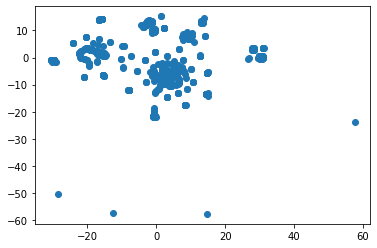

In [76]:
# Create a scatter plot of the t-SNE output

new_df['x'] = tsne_df[:,0]

new_df['y'] = tsne_df[:,1]

plt.scatter(new_df['x'], new_df['y'])
plt.show()

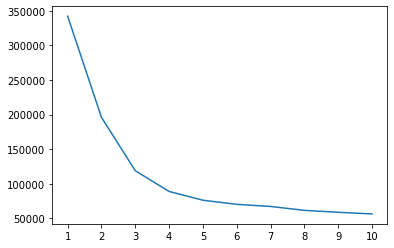

In [81]:
# Create an elbow plot to identify the best number of clusters.

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Use a for-loop to determine the inertia for each `k` between 1 through 10

for i in k:
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(new_data)
    inertia.append(k_means.inertia_)
    
# Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.

elbow_data = {"k": k, "inertia": inertia}

elbow_df = pd.DataFrame(elbow_data)
plt.xticks(k)
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.show()

    

In [ ]:
# Can the cryptocurrencies be clustered together? If so, into how many clusters?

# I think that the currencies could be clustered together into 2 or 3 clusters. At k=2 and k=3,
# there are stronger beds in the elbow curve. I would propose k=3, because after this k value
# the elbow curve begins to flatten out and appears linear.